# Учебный пример - скоркарта

## Подключаем библиотеки

In [ ]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")

import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker
%matplotlib inline

sns.set_context(
    "notebook", 
    font_scale = 1.5,       
    rc = { 
        "figure.figsize" : (30, 30), 
        "axes.titlesize" : 18 
    }
)

from sklearn.model_selection import train_test_split

import pandas.core.algorithms as algos
from pandas import Series
import scipy.stats.stats as stats
import re
import traceback
import string
from sklearn.linear_model import LogisticRegressionCV

## Загружаем данные

In [ ]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening/crx.data

--2020-09-28 17:45:15--  https://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening/crx.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 32218 (31K) [application/x-httpd-php]
Saving to: ‘crx.data’

crx.data            100%[===================>]  31.46K  --.-KB/s    in 0.1s    

2020-09-28 17:45:16 (239 KB/s) - ‘crx.data’ saved [32218/32218]



In [ ]:
df = pd.read_csv('crx.data', header=None, decimal=".")

In [ ]:
df.shape

(690, 16)

In [ ]:
df.columns = ['A' + str(i) for i in range(1, 16)] + ['target']

In [ ]:
df.head(2)

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,target
0,b,30.83,0.00,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.46,u,g,q,h,3.04,t,t,6,f,g,00043,560,+


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      690 non-null    object 
 1   A2      690 non-null    object 
 2   A3      690 non-null    float64
 3   A4      690 non-null    object 
 4   A5      690 non-null    object 
 5   A6      690 non-null    object 
 6   A7      690 non-null    object 
 7   A8      690 non-null    float64
 8   A9      690 non-null    object 
 9   A10     690 non-null    object 
 10  A11     690 non-null    int64  
 11  A12     690 non-null    object 
 12  A13     690 non-null    object 
 13  A14     690 non-null    object 
 14  A15     690 non-null    int64  
 15  target  690 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 86.4+ KB


In [ ]:
y = df.target

## Очистка и преобразование данных

In [ ]:
(df.count(axis=0)/df.shape[0])*100

A1        100.0
A2        100.0
A3        100.0
A4        100.0
A5        100.0
A6        100.0
A7        100.0
A8        100.0
A9        100.0
A10       100.0
A11       100.0
A12       100.0
A13       100.0
A14       100.0
A15       100.0
target    100.0
dtype: float64

In [ ]:
df = df.replace(to_replace='?',value=np.nan)

In [ ]:
df.fillna(df.mean(), inplace=True)

In [ ]:
df.isnull().count()

A1        690
A2        690
A3        690
A4        690
A5        690
A6        690
A7        690
A8        690
A9        690
A10       690
A11       690
A12       690
A13       690
A14       690
A15       690
target    690
dtype: int64

In [ ]:
for col in df.columns:
    if df[col].dtypes == 'object':
        df = df.fillna(df[col].value_counts().index[0])

In [ ]:
df

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,target
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,00260,0,-
686,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,00200,394,-
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,00200,1,-
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,00280,750,-


In [ ]:
categorical_columns = [c for c in df.columns if df[c].dtype.name == 'object']
numerical_columns   = [c for c in df.columns if df[c].dtype.name != 'object']
print (categorical_columns)
print (numerical_columns)

['A1', 'A2', 'A4', 'A5', 'A6', 'A7', 'A9', 'A10', 'A12', 'A13', 'A14', 'target']
['A3', 'A8', 'A11', 'A15']


In [ ]:
df.drop(['target'], axis=1, inplace=True)

In [ ]:
y = y.replace({'+': 1, '-': 0})

In [ ]:
y.value_counts()

0    383
1    307
Name: target, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.33, random_state=42)


## Монотонный WOE binning признаков

In [ ]:
max_bin = 20
force_bin = 3

def mono_bin(Y, X, n = max_bin):
    
    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[['X','Y']][df1.X.isnull()]
    notmiss = df1[['X','Y']][df1.X.notnull()]
    r = 0
    while np.abs(r) < 1:
        try:
            d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.qcut(notmiss.X, n)})
            d2 = d1.groupby('Bucket', as_index=True)
            r, p = stats.spearmanr(d2.mean().X, d2.mean().Y)
            n = n - 1 
        except Exception as e:
            n = n - 1

    if len(d2) == 1:
        n = force_bin         
        bins = algos.quantile(notmiss.X, np.linspace(0, 1, n))
        if len(np.unique(bins)) == 2:
            bins = np.insert(bins, 0, 1)
            bins[1] = bins[1]-(bins[1]/2)
        d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.cut(notmiss.X, np.unique(bins),include_lowest=True)}) 
        d2 = d1.groupby('Bucket', as_index=True)
    
    d3 = pd.DataFrame({},index=[])
    d3["MIN_VALUE"] = d2.min().X
    d3["MAX_VALUE"] = d2.max().X
    d3["COUNT"] = d2.count().Y
    d3["EVENT"] = d2.sum().Y
    d3["NONEVENT"] = d2.count().Y - d2.sum().Y
    d3=d3.reset_index(drop=True)
    
    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE':np.nan},index=[0])
        d4["MAX_VALUE"] = np.nan
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = d3.append(d4,ignore_index=True)
    
    d3["EVENT_RATE"] = d3.EVENT/d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT/d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT
    d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["IV"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT)*np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["VAR_NAME"] = "VAR"
    d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]       
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()
    
    return(d3)

def char_bin(Y, X):
        
    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[['X','Y']][df1.X.isnull()]
    notmiss = df1[['X','Y']][df1.X.notnull()]    
    df2 = notmiss.groupby('X',as_index=True)
    
    d3 = pd.DataFrame({},index=[])
    d3["COUNT"] = df2.count().Y
    d3["MIN_VALUE"] = df2.sum().Y.index
    d3["MAX_VALUE"] = d3["MIN_VALUE"]
    d3["EVENT"] = df2.sum().Y
    d3["NONEVENT"] = df2.count().Y - df2.sum().Y
    
    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE':np.nan},index=[0])
        d4["MAX_VALUE"] = np.nan
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = d3.append(d4,ignore_index=True)
    
    d3["EVENT_RATE"] = d3.EVENT/d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT/d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT
    d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["IV"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT)*np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["VAR_NAME"] = "VAR"
    d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]      
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()
    d3 = d3.reset_index(drop=True)
    
    return(d3)

def data_vars(df1, target):
    
    stack = traceback.extract_stack()
    filename, lineno, function_name, code = stack[-2]
    vars_name = re.compile(r'\((.*?)\).*$').search(code).groups()[0]
    final = (re.findall(r"[\w']+", vars_name))[-1]
    
    x = df1.dtypes.index
    count = -1
    
    for i in x:
        if i.upper() not in (final.upper()):
            if np.issubdtype(df1[i], np.number) and len(Series.unique(df1[i])) > 2:
                conv = mono_bin(target, df1[i])
                conv["VAR_NAME"] = i
                count = count + 1
            else:
                conv = char_bin(target, df1[i])
                conv["VAR_NAME"] = i            
                count = count + 1
                
            if count == 0:
                iv_df = conv
            else:
                iv_df = iv_df.append(conv,ignore_index=True)
    
    iv = pd.DataFrame({'IV':iv_df.groupby('VAR_NAME').IV.max()})
    iv = iv.reset_index()
    return(iv_df,iv)

In [ ]:
final_iv, IV = data_vars(df,y)

In [ ]:
final_iv[final_iv['VAR_NAME']=='A3']

,VAR_NAME,MIN_VALUE,MAX_VALUE,COUNT,EVENT,EVENT_RATE,NONEVENT,NON_EVENT_RATE,DIST_EVENT,DIST_NON_EVENT,WOE,IV
352,A3,0,1.5,239,82,0.343096,157,0.656904,0.267101,0.409922,-0.428339,0.196607
353,A3,1.54,5.04,221,88,0.398190,133,0.601810,0.286645,0.347258,-0.191825,0.196607
354,A3,5.085,28,230,137,0.595652,93,0.404348,0.446254,0.242820,0.608569,0.196607


In [ ]:
IV[IV['VAR_NAME']=='A3']

,VAR_NAME,IV
8,A3,0.196607


In [ ]:
pd.options.display.float_format = '{:40,.4f}'.format

In [ ]:
IV.sort_values('IV', ascending=False)

,VAR_NAME,IV
14,A9,2.8189
2,A11,0.9444
1,A10,0.9110
13,A8,0.6645
11,A6,0.6600
5,A14,0.4246
12,A7,0.3027
7,A2,0.2324
6,A15,0.2317
8,A3,0.1966


In [ ]:
def plot_bin(ev, for_excel=False):
    ind = np.arange(len(ev.index)) 
    width = 0.35
    fig, ax1 = plt.subplots(figsize=(10, 7))
    ax2 = ax1.twinx()
    p1 = ax1.bar(ind, ev['NONEVENT'], width, color=(24/254, 192/254, 196/254))
    p2 = ax1.bar(ind, ev['EVENT'], width, bottom=ev['NONEVENT'], color=(246/254, 115/254, 109/254))

    ax1.set_ylabel('Event Distribution', fontsize=15)
    ax2.set_ylabel('WOE', fontsize=15)

    plt.title(list(ev.VAR_NAME)[0], fontsize=20) 
    ax2.plot(ind, ev['WOE'], marker='o', color='blue')
    plt.legend((p2[0], p1[0]), ('bad', 'good'), loc='best', fontsize=10)

    q = list()
    for i in range(len(ev)):
        try:
            mn = str(round(ev.MIN_VALUE[i], 2))
            mx = str(round(ev.MAX_VALUE[i], 2))
        except:
            mn = str((ev.MIN_VALUE[i]))
            mx = str((ev.MAX_VALUE[i]))
        q.append(mn + '-' + mx)

    plt.xticks(ind, q, rotation='vertical')
    for tick in ax1.get_xticklabels():
        tick.set_rotation(60)
    plt.show() 

def plot_all_bins(iv_df):
    for i in [x.replace('WOE_','') for x in X_train.columns]:
        ev = iv_df[iv_df.VAR_NAME==i]
        ev.reset_index(inplace=True)
        plot_bin(ev)

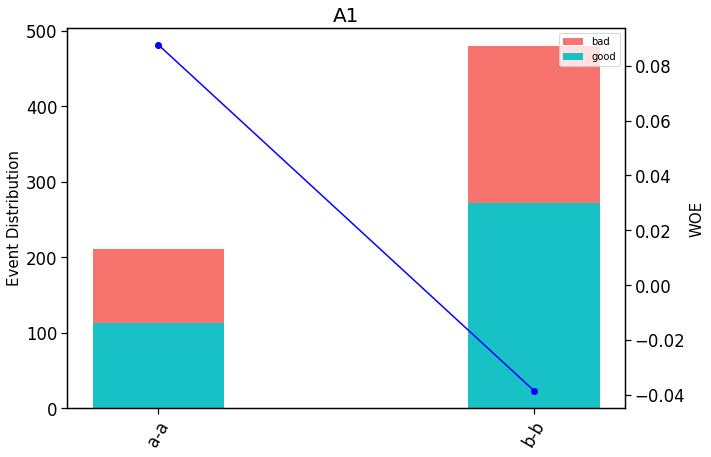

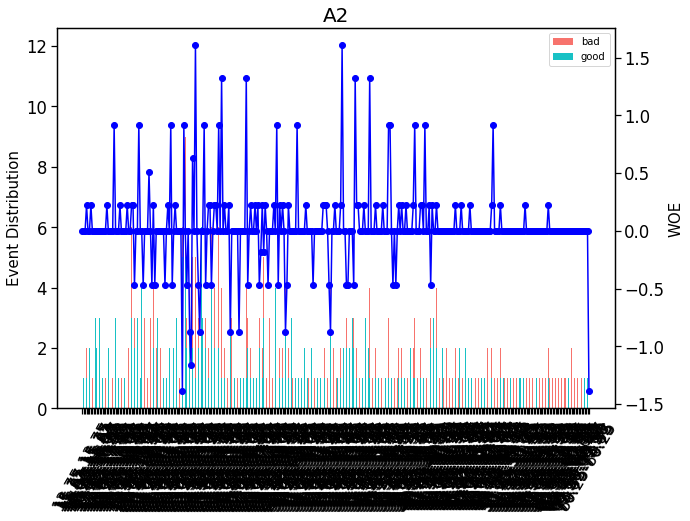

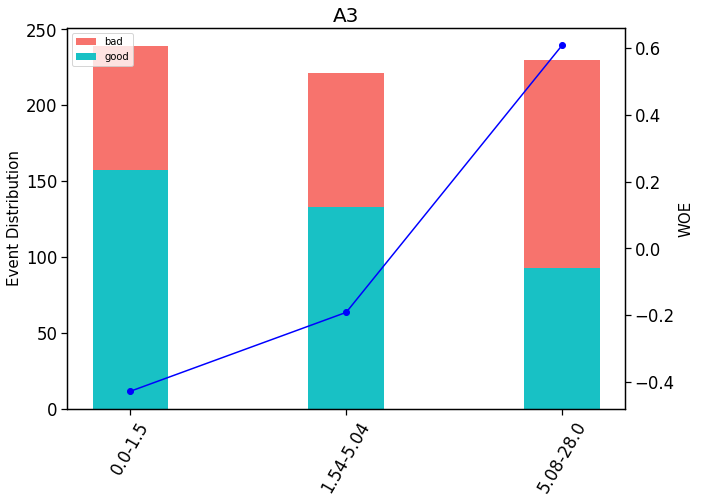

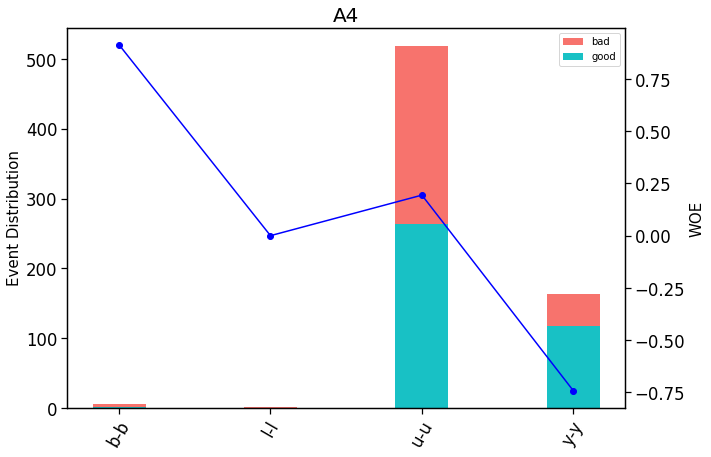

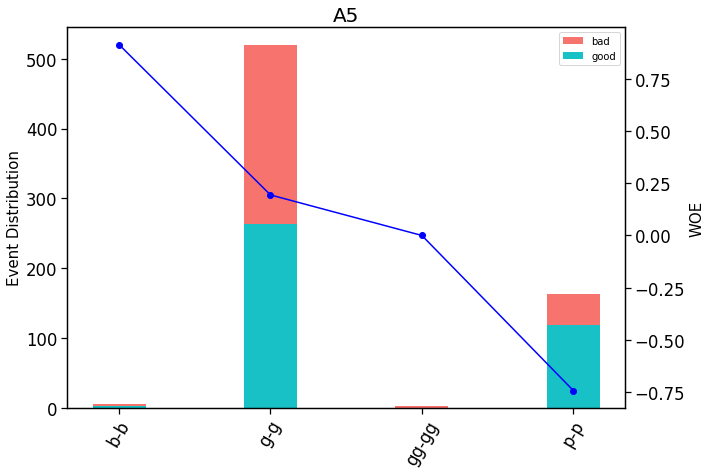

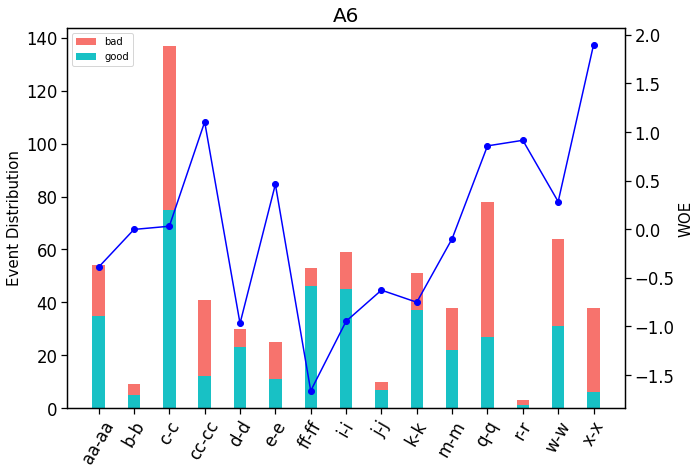

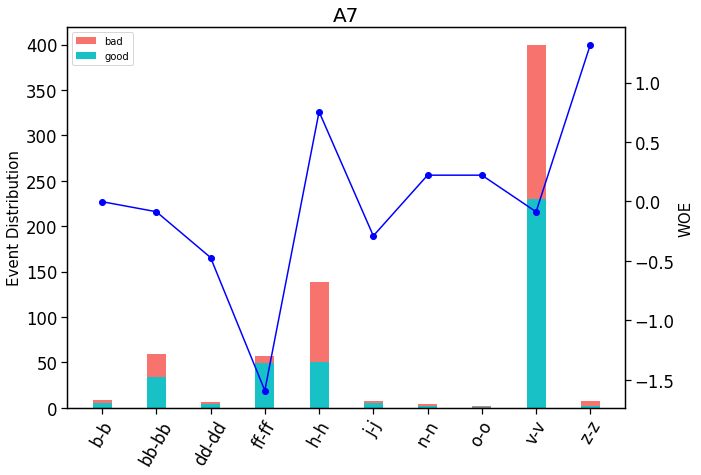

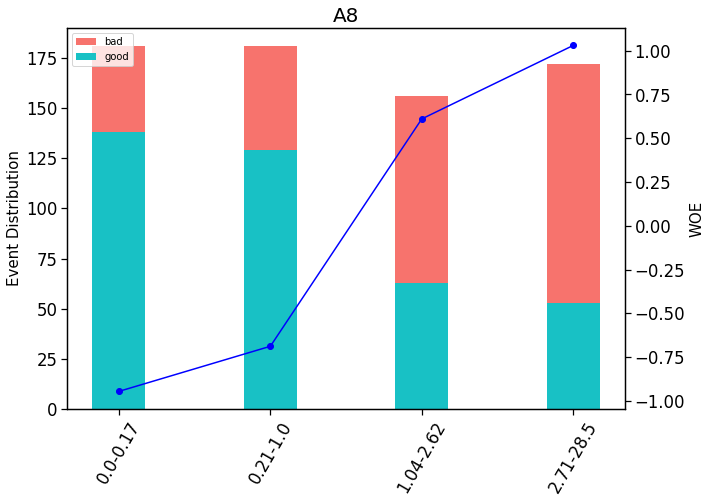

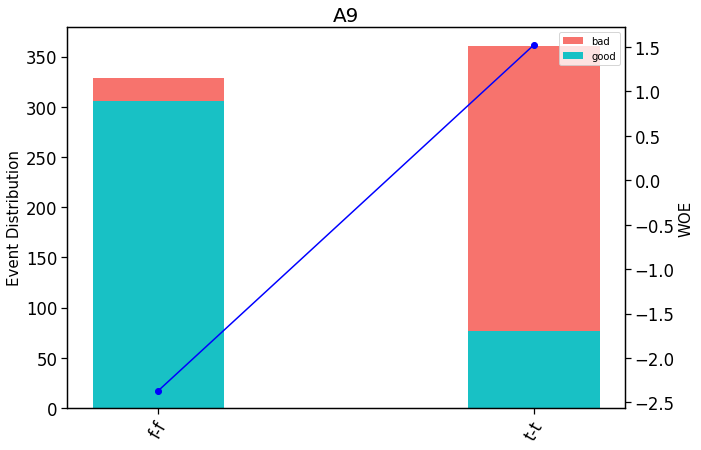

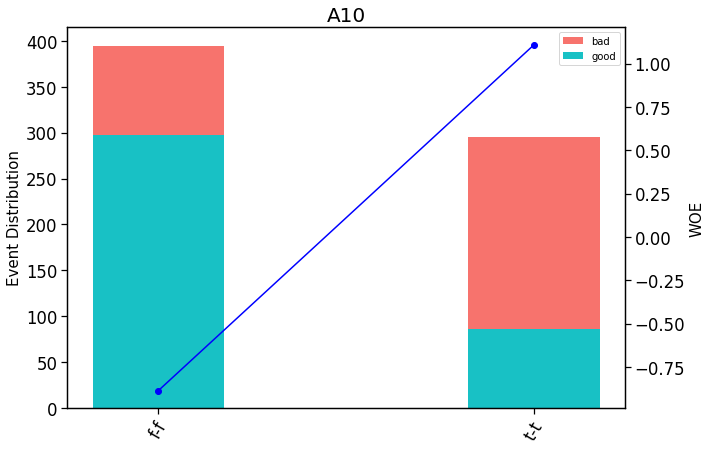

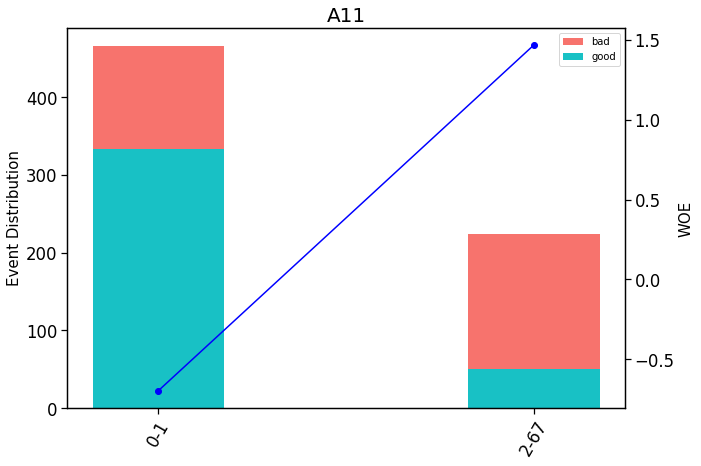

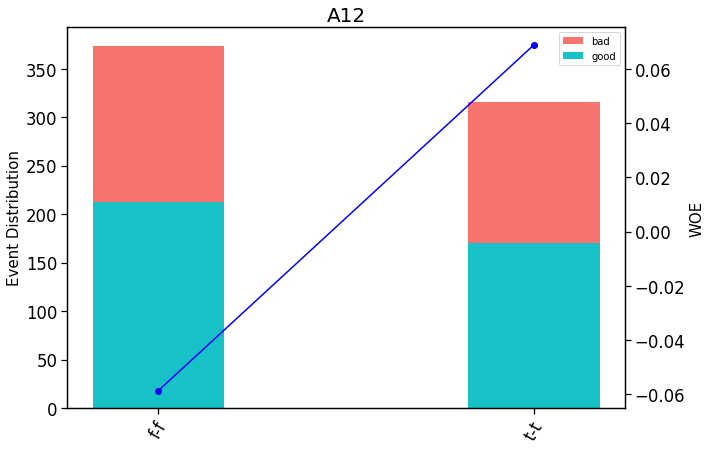

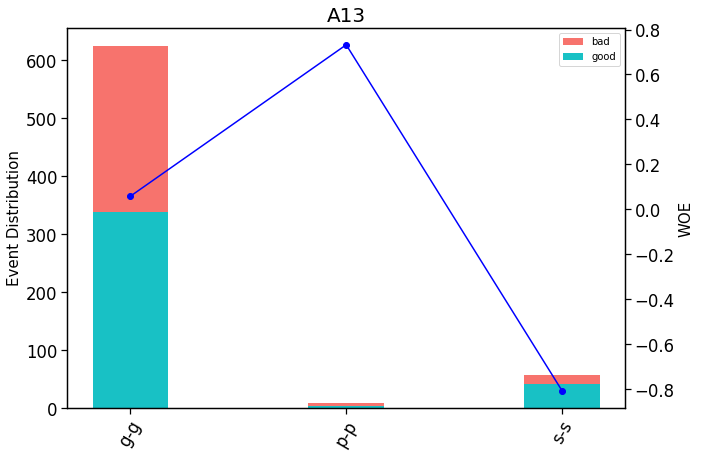

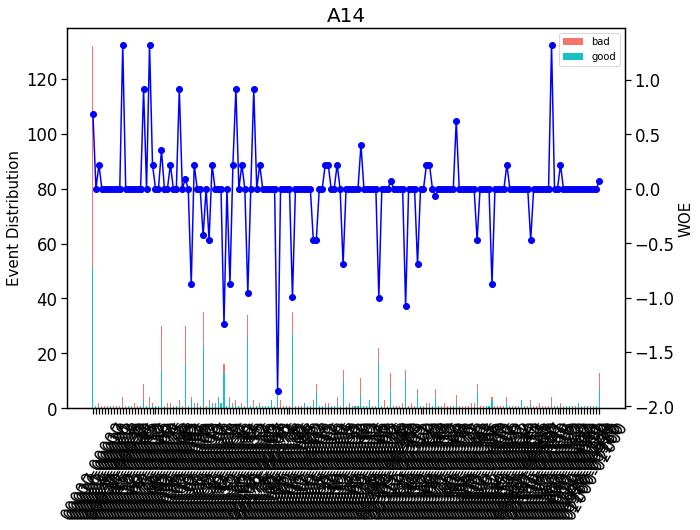

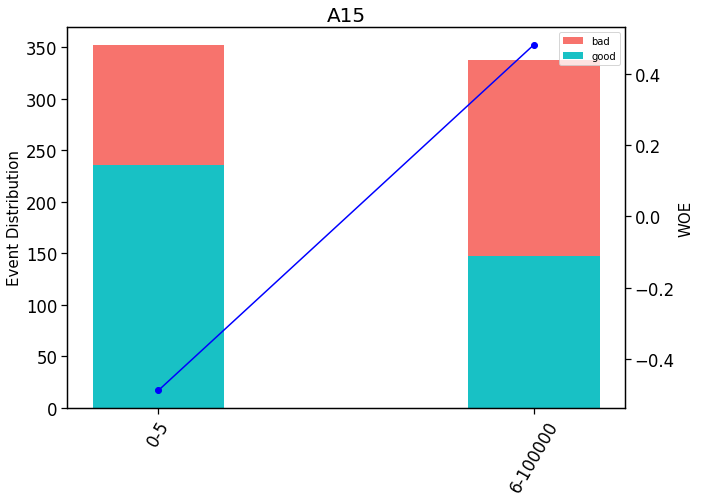

In [ ]:
plot_all_bins(final_iv)

In [ ]:
def adjust_binning(df, bins_dict):
    for i in range(len(bins_dict)):
        key = list(bins_dict.keys())[i]
        if type(list(bins_dict.values())[i])==dict:
            df[key] = df[key].map(list(bins_dict.values())[i])
        else:
            categories = list()
            for j in range(len(list(bins_dict.values())[i])):
                if j == 0:
                    categories.append('<'+ str(list(bins_dict.values())[i][j]))
                    try:                        
                        categories.append('(' + str(list(bins_dict.values())[i][j]) +'; '+ str(list(bins_dict.values())[i][j+1]) + ']')
                    except:                       
                        categories.append('(' + str(list(bins_dict.values())[i][j]))
                elif j==len(list(bins_dict.values())[i])-1:
                    categories.append(str(list(bins_dict.values())[i][j]) +'>')
                else:
                    categories.append('(' + str(list(bins_dict.values())[i][j]) +'; '+ str(list(bins_dict.values())[i][j+1]) + ']')
            
            values = [df[key].min()] + list(bins_dict.values())[i]  + [df[key].max()]        
            df[key + '_bins'] = pd.cut(df[key], values, include_lowest=True, labels=categories).astype(object).fillna('_MISSING_').astype(str)
            df[key] = df[key + '_bins']#.map(df.groupby(key + '_bins')[key].agg('median'))
            df.drop([key + '_bins'], axis=1, inplace=True)
    return df

In [ ]:
df.shape

(690, 15)


## Обучение модели

In [ ]:
from sklearn.metrics import auc, accuracy_score, roc_auc_score, f1_score, log_loss, classification_report

In [ ]:
!pip install scikit-plot

In [ ]:
!pip install eli5

     |████████████████████████████████| 112kB 2.8MB/s 


In [ ]:
import scikitplot as skplt
import eli5

In [ ]:
def plot_score(clf, X_test, y_test, feat_to_show=30, is_normalize=False, cut_off=0.5):
    #cm = confusion_matrix(pd.Series(clf.predict_proba(X_test)[:,1]).apply(lambda x: 1 if x>cut_off else 0), y_test)
    print ('ROC_AUC:  ', round(roc_auc_score(y_test, clf.predict_proba(X_test)[:,1]), 3))
    print ('Gini:     ', round(2*roc_auc_score(y_test, clf.predict_proba(X_test)[:,1]) - 1, 3))
    print ('F1_score: ', round(f1_score(y_test, clf.predict(X_test)), 3))
    print ('Log_loss: ', round(log_loss(y_test, clf.predict(X_test)), 3))
    
    print ('\n')
    #print ('Classification_report: \n', classification_report(pd.Series(clf.predict_proba(X_test)[:,1]).apply(lambda x: 1 if x>cut_off else 0), y_test))
    skplt.metrics.plot_confusion_matrix(y_test, pd.Series(clf.predict_proba(X_test)[:,1]).apply(lambda x: 1 if x>cut_off else 0), title="Confusion Matrix",
                    normalize=is_normalize,figsize=(4,4),text_fontsize='large')
    display(eli5.show_weights(clf, top=20, feature_names = list(X_test.columns)))

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in df.columns:
    if df[col].dtypes=='object':
        df[col]=le.fit_transform(df[col])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.33, stratify=y, random_state=42)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX_train = scaler.fit_transform(X_train)
rescaledX_test = scaler.fit_transform(X_test)

ROC_AUC:   0.954
Gini:      0.909
F1_score:  0.875
Log_loss:  3.939




Weight?,Feature
+3.201,A9
+0.825,A10
+0.260,A1
+0.197,A13
+0.172,A5
+0.106,A8
+0.104,A11
+0.054,A6
+0.031,A7
+0.000,A15


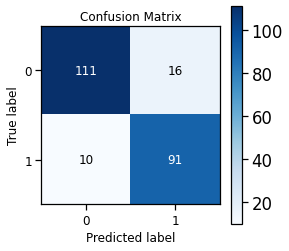

In [ ]:
clf_lr = LogisticRegressionCV(random_state=1, cv=7)
clf_lr.fit(X_train, y_train)

plot_score(clf_lr, X_test, y_test, cut_off=0.5)

## Вычисление скорбаллов

In [ ]:
coefficients = pd.DataFrame({"Feature":X_train.columns,"Coefficients":np.transpose(clf_lr.coef_[0] )})

In [ ]:
coefficients.head(10)

,Feature,Coefficients
0,A1,0.2595
1,A2,-0.0026
2,A3,-0.0130
3,A4,-1.1814
4,A5,0.1718
5,A6,0.0543
6,A7,0.0315
7,A8,0.1055
8,A9,3.2009
9,A10,0.8254


In [ ]:
clf_lr.intercept_

array([-0.89321596])

In [ ]:
IV[IV['VAR_NAME']=='A3']

,VAR_NAME,IV
8,A3,0.1966


In [ ]:
coefficients[coefficients['Feature']=='A3'].Coefficients

2                                    -0.0130
Name: Coefficients, dtype: float64

In [ ]:
beta = coefficients[coefficients['Feature']=='A3'].Coefficients.iloc[0]

In [ ]:
alpha = 0

In [ ]:
n = X_train.shape[1]

In [ ]:
import math

In [ ]:
factor = 40/math.log(2)

In [ ]:
factor

57.70780163555854

In [ ]:
offset = 600 -57.7 * math.log(50)

In [ ]:
offset

374.2762725867959

In [ ]:
final_iv[final_iv['VAR_NAME']=='A3'].WOE

352                                    -0.4283
353                                    -0.1918
354                                     0.6086
Name: WOE, dtype: float64

In [ ]:
o = offset/n

In [ ]:
o

24.951751505786394

In [ ]:
beta = 0.2

In [ ]:
for kk in final_iv[final_iv['VAR_NAME']=='A3'].WOE:
    #print(kk)
    ll = round(beta*kk+alpha/n,3)
    tt=ll*factor
    score = tt + o
    print(round(score))

20
23
32


In [ ]:
final_iv[final_iv['VAR_NAME']=='A3']

,VAR_NAME,MIN_VALUE,MAX_VALUE,COUNT,EVENT,EVENT_RATE,NONEVENT,NON_EVENT_RATE,DIST_EVENT,DIST_NON_EVENT,WOE,IV
352,A3,0.0000,1.5000,239,82,0.3431,157,0.6569,0.2671,0.4099,-0.4283,0.1966
353,A3,1.5400,5.0400,221,88,0.3982,133,0.6018,0.2866,0.3473,-0.1918,0.1966
354,A3,5.0850,28.0000,230,137,0.5957,93,0.4043,0.4463,0.2428,0.6086,0.1966
